In [1]:
%matplotlib inline
import datetime as dt
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
sys.path.append("C:\\Users\\konar\\IdeaProjects\\lobSimulations")
from hawkes import simulate_smalltick # dataLoader #, fit, inference, simulate
import numpy as np
import time

C:\Users\konar\IdeaProjects\lobSimulations\hawkes\simulate_smalltick.py:410: SyntaxWarning: invalid escape sequence '\P'
  simulate_smallTick(400, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD_symmetric" , beta = 0.6, avgSpread = .95, spread0 = 110, price0 = 1700, M_med = 50, verbose=True)
C:\Users\konar\IdeaProjects\lobSimulations\hawkes\simulate_smalltick.py:410: SyntaxWarning: invalid escape sequence '\P'
  simulate_smallTick(400, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD_symmetric" , beta = 0.6, avgSpread = .95, spread0 = 110, price0 = 1700, M_med = 50, verbose=True)


In [9]:
T, lob , _ = simulate_smalltick.simulate_smallTick(23400, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD_symmetric" , beta = 0.6, avgSpread = .95, spread0 = 110, price0 = 1700, M_med = 50, verbose= False)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\konar\AppData\Local\Temp\ipykernel_36236\3251714528.py:1: SyntaxWarning: invalid escape sequence '\P'
  T, lob , _ = simulate_smalltick.simulate_smallTick(23400, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD_symmetric" , beta = 0.6, avgSpread = .95, spread0 = 110, price0 = 1700, M_med = 50, verbose= False)
C:\Users\konar\AppData\Local\Temp\ipykernel_36236\3251714528.py:1: SyntaxWarning: invalid escape sequence '\P'
  T, lob , _ = simulate_smalltick.simulate_smallTick(23400, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_di

initial spread:  1.099999999999909 



In [10]:
lob[0]

{'mid': 1700,
 'Ask_touch': (np.float64(1700.55), np.int64(37)),
 'Bid_touch': (np.float64(1699.45), np.int64(427)),
 'Ask_m_T': np.int64(17),
 'Ask_m_D': np.int64(2),
 'Bid_m_T': np.int64(2),
 'Bid_m_D': np.int64(2),
 'Ask_deep': (np.float64(1700.72), np.int64(178)),
 'Bid_deep': (np.float64(1699.43), np.int64(84))}

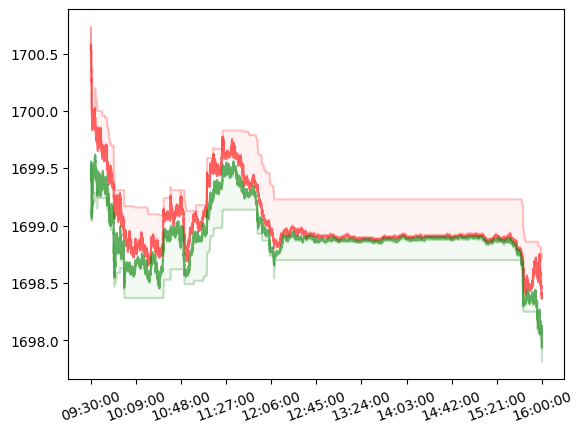

In [11]:
ask_t = []
bid_t = []
ask_d = []
bid_d= []
ask_m_D = []
bid_m_D = []
spread = []
for r in lob:
    ask_t.append(r['Ask_touch'][0])
    bid_t.append(r['Bid_touch'][0])
    ask_d.append(r['Ask_deep'][0])
    bid_d.append(r['Bid_deep'][0])
    bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
    ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
    spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
t = np.append([0], np.array(T[1:])[:,1])
t = t.astype(float) + 9.5*3600

fig, ax = plt.subplots()
ax.plot(t, ask_t, color = "r", alpha =0.5)
ax.plot(t, ask_d, color="r", alpha = 0.2)
ax.plot(t, ask_m_D, color="r", alpha = 0.2)
ax.plot(t, bid_t, color="g", alpha =0.5)
ax.plot(t, bid_d, color="g", alpha = 0.2)
ax.plot(t, bid_m_D, color="g", alpha = 0.2)
ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05)
ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05)
count = int((max(t) - min(t))/10)
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.show()

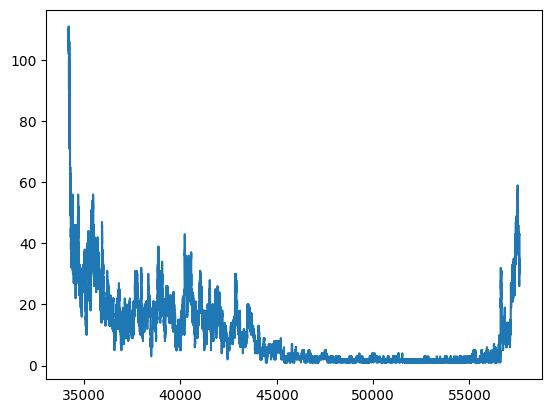

In [12]:
plt.plot(t, spread)

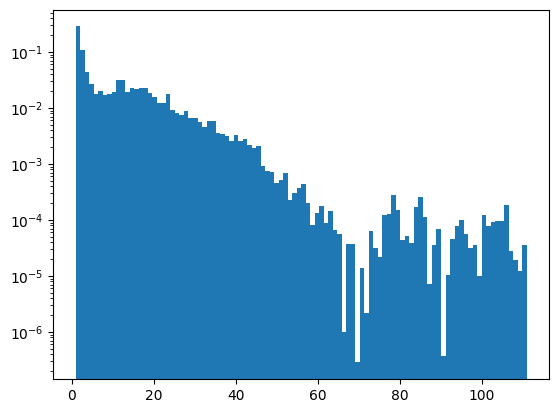

In [22]:
plt.hist(spread[1:], weights = np.diff(t), density=True,bins=100)
plt.yscale('log')
# plt.xscale('log')

In [14]:
len(spread)

245607

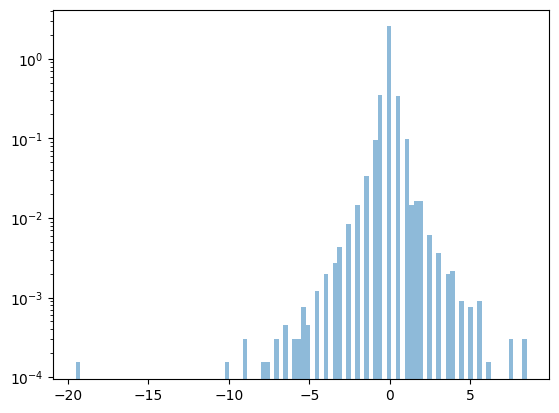

In [24]:
mid = (np.array(ask_t) + np.array(bid_t))/2
tau = 1
max_t = np.round(max(np.array(t) - 34200), decimals=0)
sample_x = np.linspace(0, max_t, int(max_t/tau))
idxs = np.searchsorted(np.array(t) - 34200, sample_x)[1:-1] - 1
sample_y = mid[idxs]
rets = np.diff(sample_y)# np.exp(np.diff(np.log(sample_y))) - 1
plt.hist(rets*100, bins = 100, alpha = 0.5, density = True)
plt.yscale('log')
plt.show()

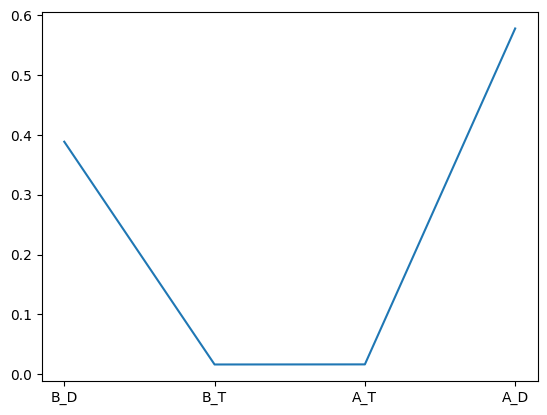

In [43]:
q_ask_t = []
q_bid_t = []
q_ask_d = []
q_bid_d= []
for r in lob:
    q_ask_t.append(r['Ask_touch'][1])
    q_bid_t.append(r['Bid_touch'][1])
    q_ask_d.append(r['Ask_deep'][1])
    q_bid_d.append(r['Bid_deep'][1])
Q= np.array([q_bid_d, q_bid_t, q_ask_t, q_ask_d])
Q = np.multiply(Q,(1./Q.sum(axis=0)))
Q_shape = Q.sum(axis=1)
Q_shape =Q_shape/Q_shape.sum()
plt.plot(['B_D', 'B_T', 'A_T', 'A_D'],Q_shape)


In [44]:
# Large tick:

In [53]:
T, lob , _ = simulate_smalltick.simulate_smallTick(100, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD_symmetric" , beta = 0.6, avgSpread = .95, spread0 = 4, price0 = 45, M_med = 50, verbose= False)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\konar\AppData\Local\Temp\ipykernel_36236\3615856382.py:1: SyntaxWarning: invalid escape sequence '\P'
  T, lob , _ = simulate_smalltick.simulate_smallTick(100, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD_symmetric" , beta = 0.6, avgSpread = .95, spread0 = 4, price0 = 45, M_med = 50, verbose= False)
C:\Users\konar\AppData\Local\Temp\ipykernel_36236\3615856382.py:1: SyntaxWarning: invalid escape sequence '\P'
  T, lob , _ = simulate_smalltick.simulate_smallTick(100, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD_sy

initial spread:  0.04000000000000625 



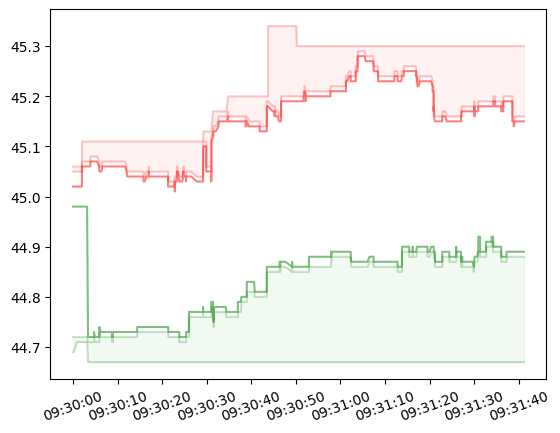

In [54]:
ask_t = []
bid_t = []
ask_d = []
bid_d= []
ask_m_D = []
bid_m_D = []
spread = []
for r in lob:
    ask_t.append(r['Ask_touch'][0])
    bid_t.append(r['Bid_touch'][0])
    ask_d.append(r['Ask_deep'][0])
    bid_d.append(r['Bid_deep'][0])
    bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
    ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
    spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
t = np.append([0], np.array(T[1:])[:,1])
t = t.astype(float) + 9.5*3600

fig, ax = plt.subplots()
ax.plot(t, ask_t, color = "r", alpha =0.5)
ax.plot(t, ask_d, color="r", alpha = 0.2)
ax.plot(t, ask_m_D, color="r", alpha = 0.2)
ax.plot(t, bid_t, color="g", alpha =0.5)
ax.plot(t, bid_d, color="g", alpha = 0.2)
ax.plot(t, bid_m_D, color="g", alpha = 0.2)
ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05)
ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05)
count = int((max(t) - min(t))/10)
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.show()

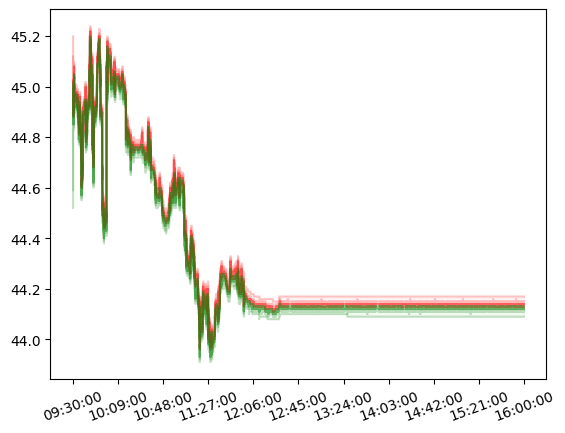

In [48]:
ask_t = []
bid_t = []
ask_d = []
bid_d= []
ask_m_D = []
bid_m_D = []
spread = []
for r in lob:
    ask_t.append(r['Ask_touch'][0])
    bid_t.append(r['Bid_touch'][0])
    ask_d.append(r['Ask_deep'][0])
    bid_d.append(r['Bid_deep'][0])
    bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
    ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
    spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
t = np.append([0], np.array(T[1:])[:,1])
t = t.astype(float) + 9.5*3600

fig, ax = plt.subplots()
ax.plot(t, ask_t, color = "r", alpha =0.5)
ax.plot(t, ask_d, color="r", alpha = 0.2)
ax.plot(t, ask_m_D, color="r", alpha = 0.2)
ax.plot(t, bid_t, color="g", alpha =0.5)
ax.plot(t, bid_d, color="g", alpha = 0.2)
ax.plot(t, bid_m_D, color="g", alpha = 0.2)
ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05)
ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05)
count = int((max(t) - min(t))/10)
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.show()

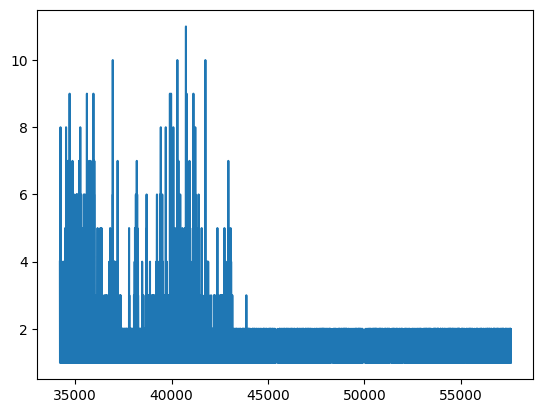

In [52]:
plt.plot(t, spread)

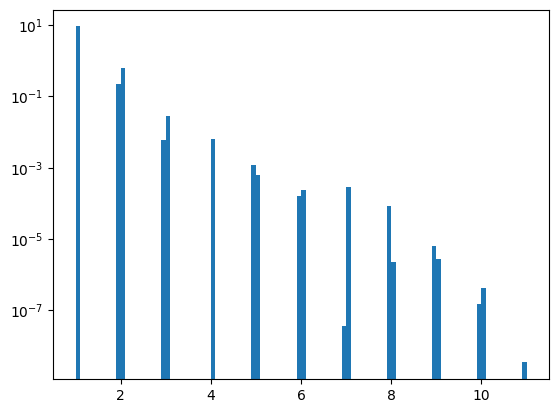

In [49]:
plt.hist(spread[1:], weights = np.diff(t), density=True,bins=100)
plt.yscale('log')
# plt.xscale('log')

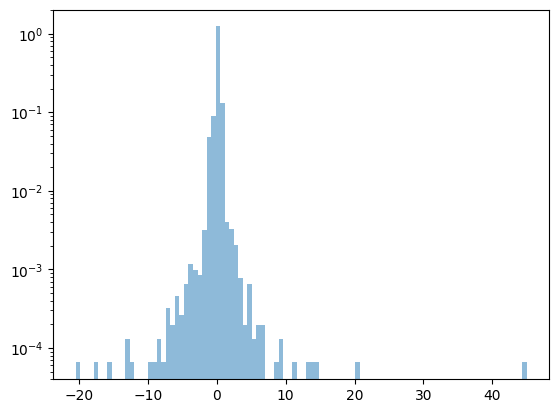

In [50]:
mid = (np.array(ask_t) + np.array(bid_t))/2
tau = 1
max_t = np.round(max(np.array(t) - 34200), decimals=0)
sample_x = np.linspace(0, max_t, int(max_t/tau))
idxs = np.searchsorted(np.array(t) - 34200, sample_x)[1:-1] - 1
sample_y = mid[idxs]
rets = np.diff(sample_y)# np.exp(np.diff(np.log(sample_y))) - 1
plt.hist(rets*100, bins = 100, alpha = 0.5, density = True)
plt.yscale('log')
plt.show()

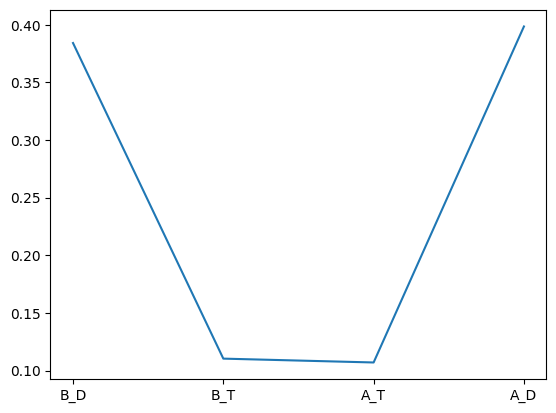

In [51]:
q_ask_t = []
q_bid_t = []
q_ask_d = []
q_bid_d= []
for r in lob:
    q_ask_t.append(r['Ask_touch'][1])
    q_bid_t.append(r['Bid_touch'][1])
    q_ask_d.append(r['Ask_deep'][1])
    q_bid_d.append(r['Bid_deep'][1])
Q= np.array([q_bid_d, q_bid_t, q_ask_t, q_ask_d])
Q = np.multiply(Q,(1./Q.sum(axis=0)))
Q_shape = Q.sum(axis=1)
Q_shape =Q_shape/Q_shape.sum()
plt.plot(['B_D', 'B_T', 'A_T', 'A_D'],Q_shape)
